APLICANDO OS FILTROS SOBEL - filtro para destacar os contornos

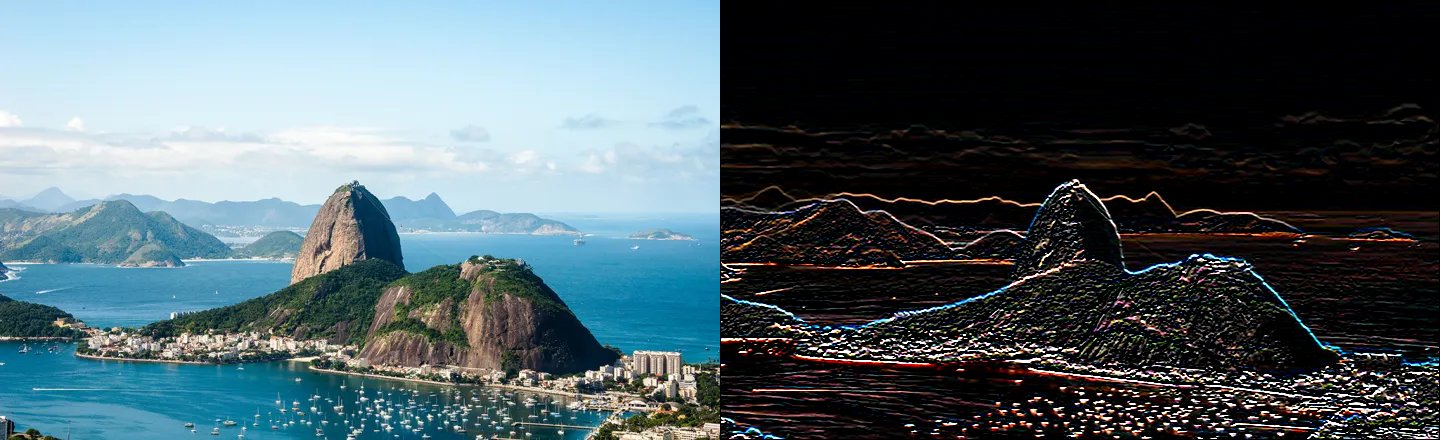

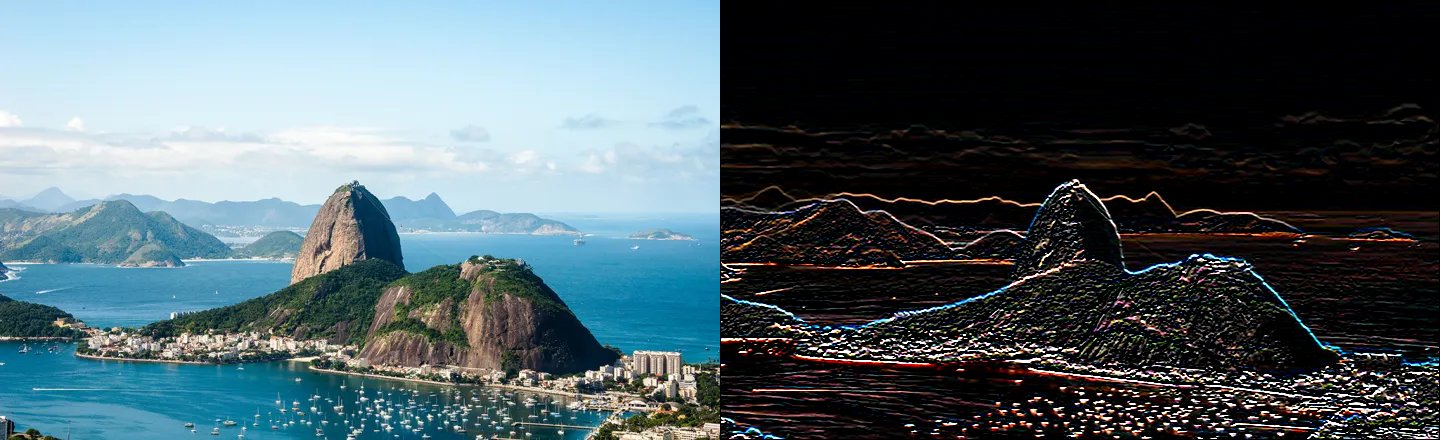

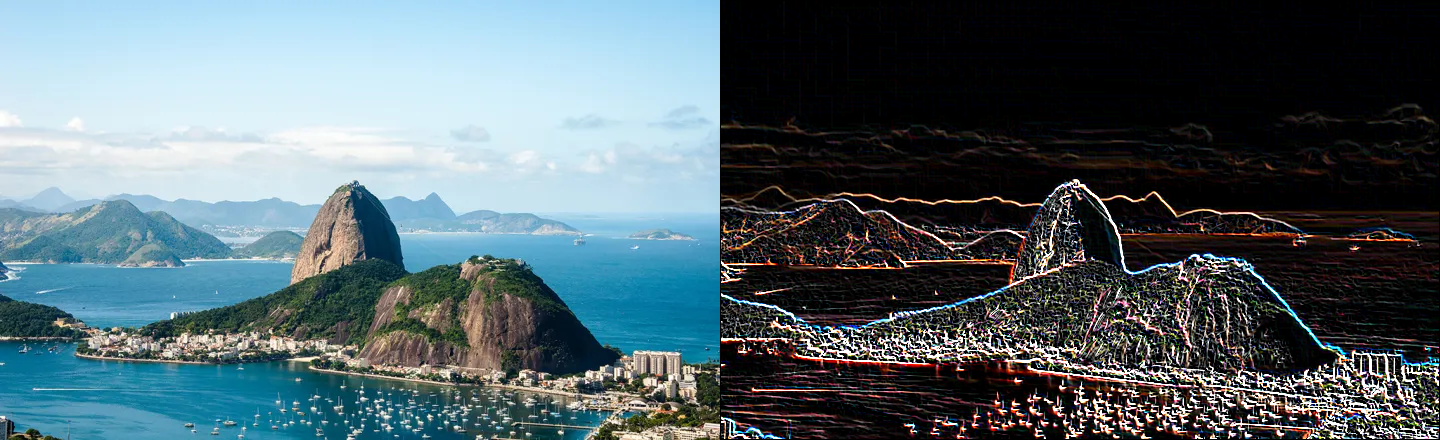

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

def apply_sobelx(image):
    height, width, channels = image.shape
    filtered_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Máscara do filtro sobelx
    sobelx = np.array([[1, 2, 1],
                               [0, 0, 0],
                               [-1, -2, -1]])

    # Percorre a imagem aplicando o filtro sobelx
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            for k in range(channels):
                total = 0
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        total += image[i + m, j + n, k] * sobelx[m + 1, n + 1]
                filtered_image[i, j, k] = np.clip(total, 0, 255)

    return filtered_image

def apply_sobely(image):
    height, width, channels = image.shape
    filtered_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Máscara do filtro sobely
    sobely = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

    # Percorre a imagem aplicando o filtro sobely
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            for k in range(channels):
                total = 0
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        total += image[i + m, j + n, k] * sobely[m + 1, n + 1]
                filtered_image[i, j, k] = np.clip(total, 0, 255)

    return filtered_image

imagem = cv2.imread('/content/pao_de_açucar.png')
imgx = apply_sobelx(imagem)
imgy = apply_sobely(imagem)
img_add = cv2.add(imgx,imgy)

resultado1 = cv2.hconcat([imagem,imgx])
resultado2 = cv2.hconcat([imagem,imgy])
resultado3 = cv2.hconcat([imagem,img_add])

cv2_imshow(resultado1)
cv2_imshow(resultado1)
cv2_imshow(resultado3)
cv2.waitKey(0)
cv2.destroyAllWindows()
